In [1]:
import re, string, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
from nltk.corpus import stopwords
from nltk import download


In [2]:
print("Загрузка датасета 20 Newsgroups...")
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = data.data
labels = data.target
label_names = data.target_names


Загрузка датасета 20 Newsgroups...


In [3]:
download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    tokens = text.split()
    return " ".join([word for word in tokens if word not in stop_words])

print("Предобработка текстов...")
texts_cleaned = [preprocess(doc) for doc in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirillzuenko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Предобработка текстов...


Распределение по категориям: Counter({np.int64(10): 999, np.int64(15): 997, np.int64(8): 996, np.int64(9): 994, np.int64(11): 991, np.int64(13): 990, np.int64(7): 990, np.int64(5): 988, np.int64(14): 987, np.int64(2): 985, np.int64(12): 984, np.int64(3): 982, np.int64(6): 975, np.int64(1): 973, np.int64(4): 963, np.int64(17): 940, np.int64(16): 910, np.int64(0): 799, np.int64(18): 775, np.int64(19): 628})


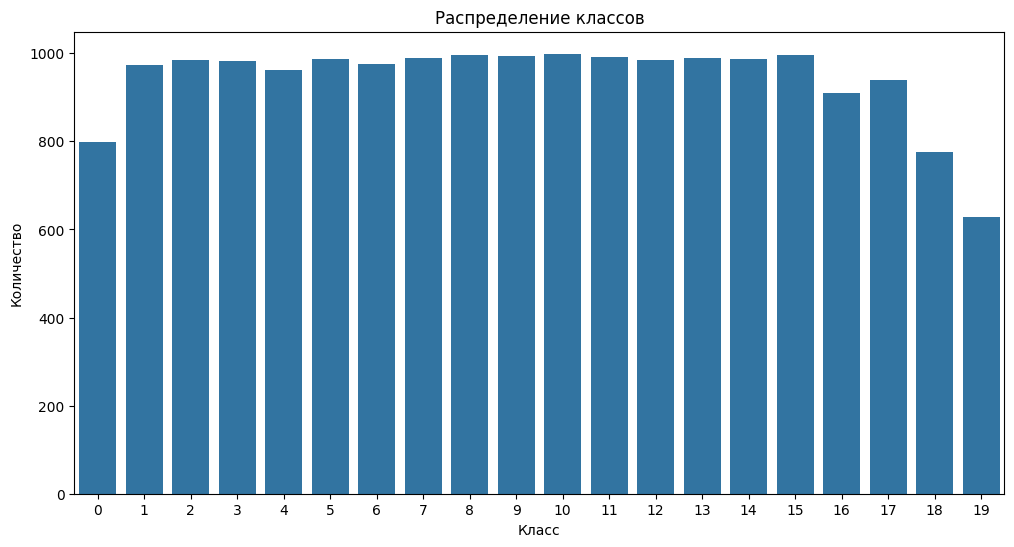

In [4]:
label_counts = Counter(labels)
print("Распределение по категориям:", label_counts)
plt.figure(figsize=(12,6))
sns.countplot(x=labels)
plt.title("Распределение классов")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()


In [5]:
for i in range(5):
    print(f"Категория: {label_names[labels[i]]}\nТекст: {texts[i][:500]}\n{'-'*80}")


Категория: rec.sport.hockey
Текст: 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a
--------------------------------------------------------------------------------
Категория: comp.sys.ibm.pc.hardware
Текст: My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

---------------

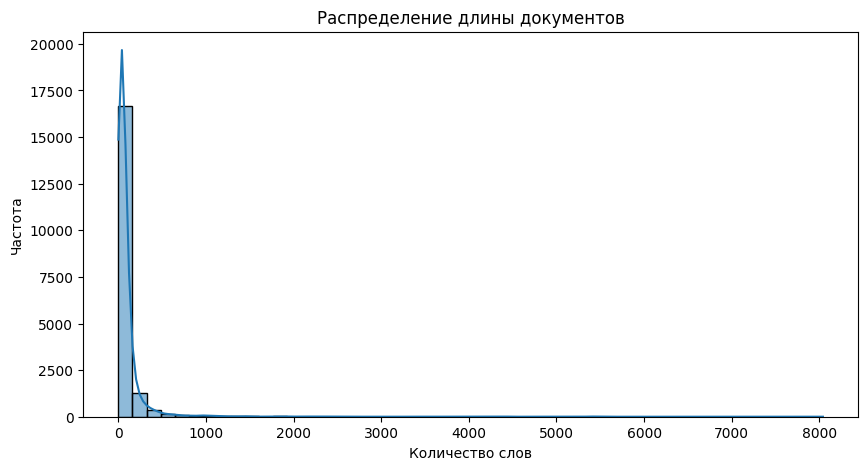

In [6]:
doc_lengths = [len(doc.split()) for doc in texts_cleaned]
plt.figure(figsize=(10,5))
sns.histplot(doc_lengths, bins=50, kde=True)
plt.title("Распределение длины документов")
plt.xlabel("Количество слов")
plt.ylabel("Частота")
plt.show()


In [7]:
print("Векторизация TF-IDF...")
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(texts_cleaned)


Векторизация TF-IDF...


In [8]:
print("Построение кластеров с KMeans...")
n_clusters = len(set(labels))
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
preds = kmeans.fit_predict(X)


Построение кластеров с KMeans...


Оценка + визуализация

In [9]:
ari = adjusted_rand_score(labels, preds)
sil_score = silhouette_score(X, preds)
print(f"Индекс ARI: {ari:.4f}")
print(f"Коэффициент силуэта: {sil_score:.4f}")


Индекс ARI: 0.0272
Коэффициент силуэта: -0.0143


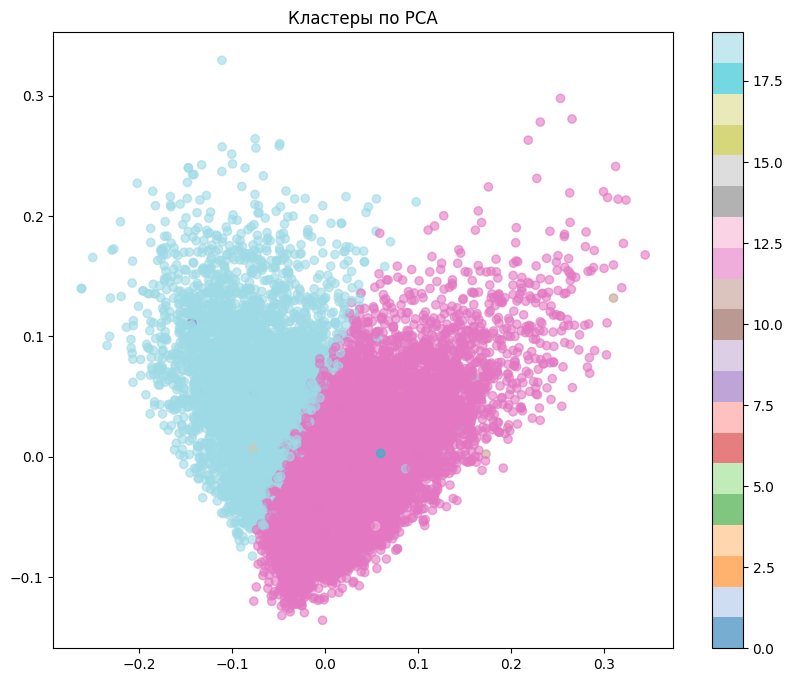

In [10]:
X_pca = PCA(n_components=2).fit_transform(X.toarray())
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds, cmap='tab20', alpha=0.6)
plt.title("Кластеры по PCA")
plt.colorbar()
plt.show()


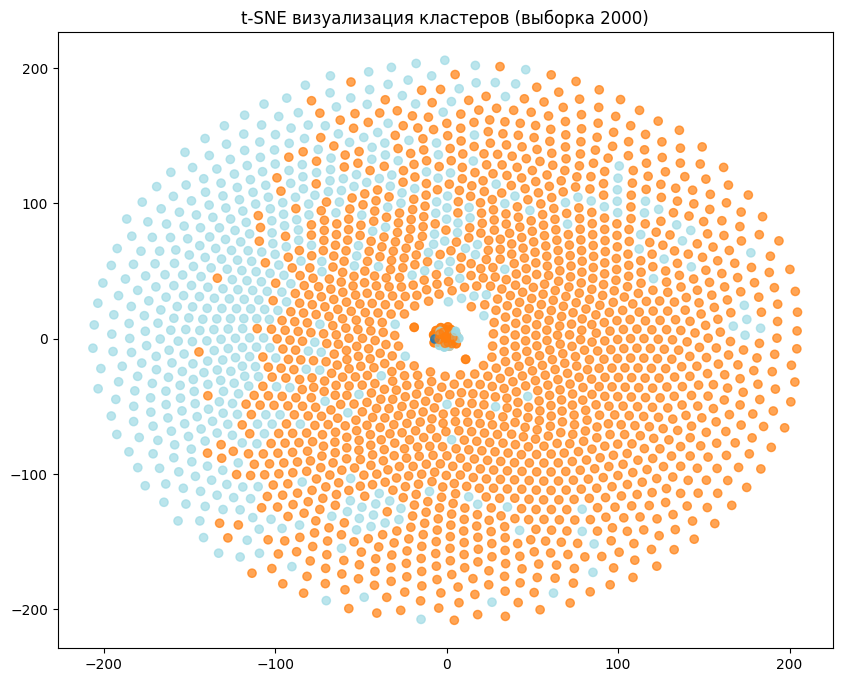

In [11]:
X_sample = X[:2000]
labels_sample = preds[:2000]
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_sample.toarray())
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_sample, cmap='tab20', alpha=0.7)
plt.title("t-SNE визуализация кластеров (выборка 2000)")
plt.show()


In [12]:
print("Разделение на train, val, test...")
X_train_val, X_test, y_train_val, y_test = train_test_split(X, labels, test_size=0.15, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)
print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


Разделение на train, val, test...
Train: (13191, 10000)
Val: (2828, 10000)
Test: (2827, 10000)
